In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.isnull().sum() # No missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Verify data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Convert date to datetime
df['date'].unique()
df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

In [6]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312057
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


<Figure size 1000x600 with 0 Axes>

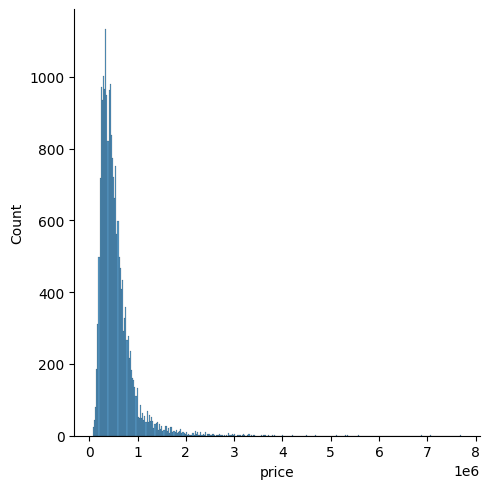

In [7]:
plt.figure(figsize=(10,6))
sns.displot(df['price']) #Most of the houses are between 0 and 1.5 million, with a few outliers above 2 million

<Axes: xlabel='bedrooms', ylabel='count'>

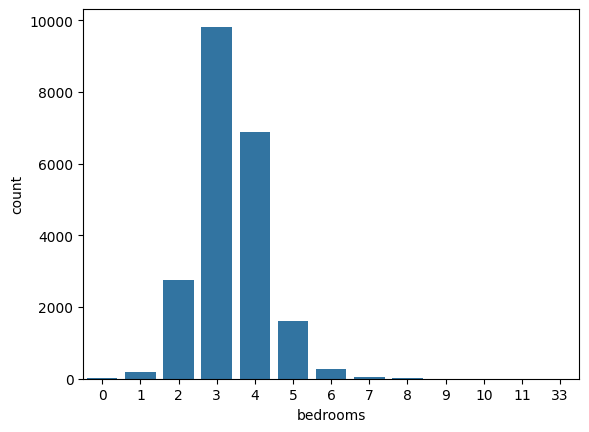

In [8]:
sns.countplot(x="bedrooms", data=df) #Most of the houses have between 2 and 5 bedrooms

In [9]:
df.corr()['price'].sort_values() #The most correlated feature with price is sqft_living

zipcode         -0.053203
id              -0.016762
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

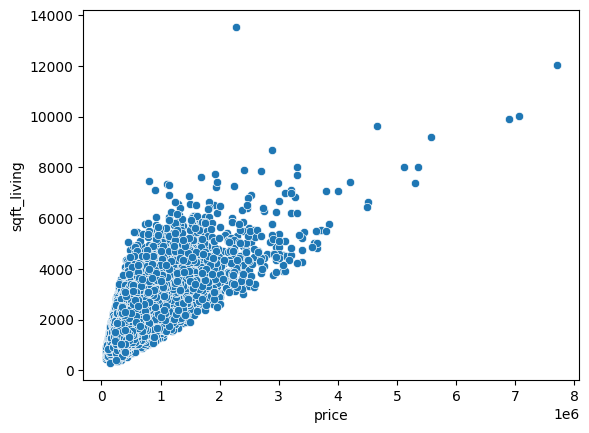

In [10]:
sns.scatterplot(x='price',y='sqft_living',data=df) #There is a positive correlation between price and square footage of living space

<Axes: xlabel='long', ylabel='lat'>

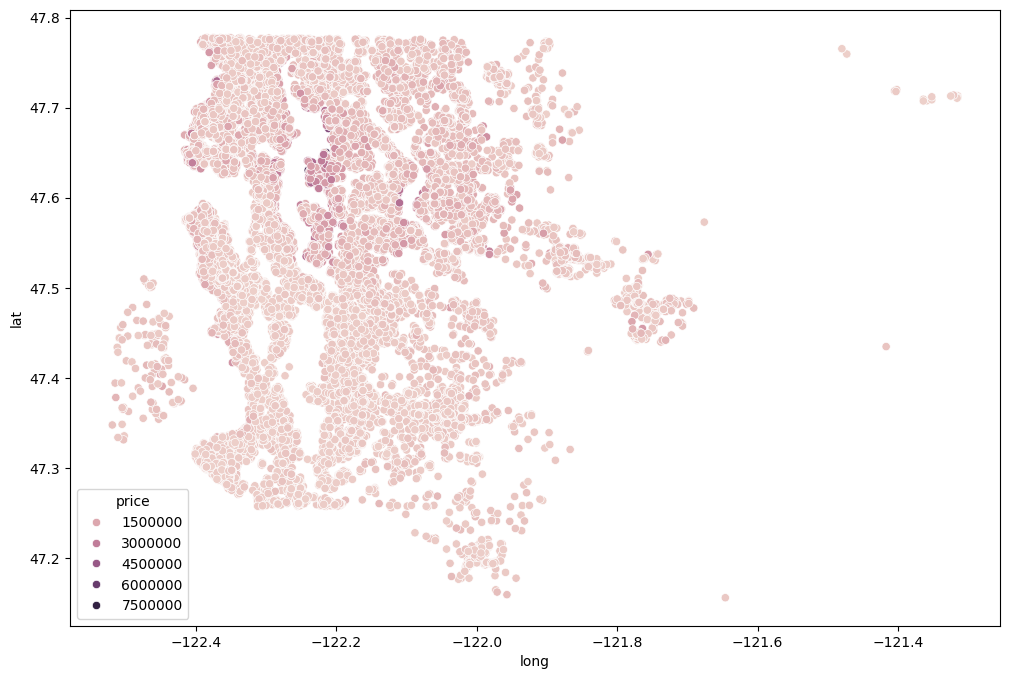

In [11]:
plt.figure(figsize=(12,8))

sns.scatterplot(x="long",y="lat",data=df, hue="price") #There are some areas with higher prices
# Some outliers are disturbing the visualization, so we will remove them

In [12]:
df.sort_values('price',ascending=False).head(10) #The most expensive house is in the 98039 zip code

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [13]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

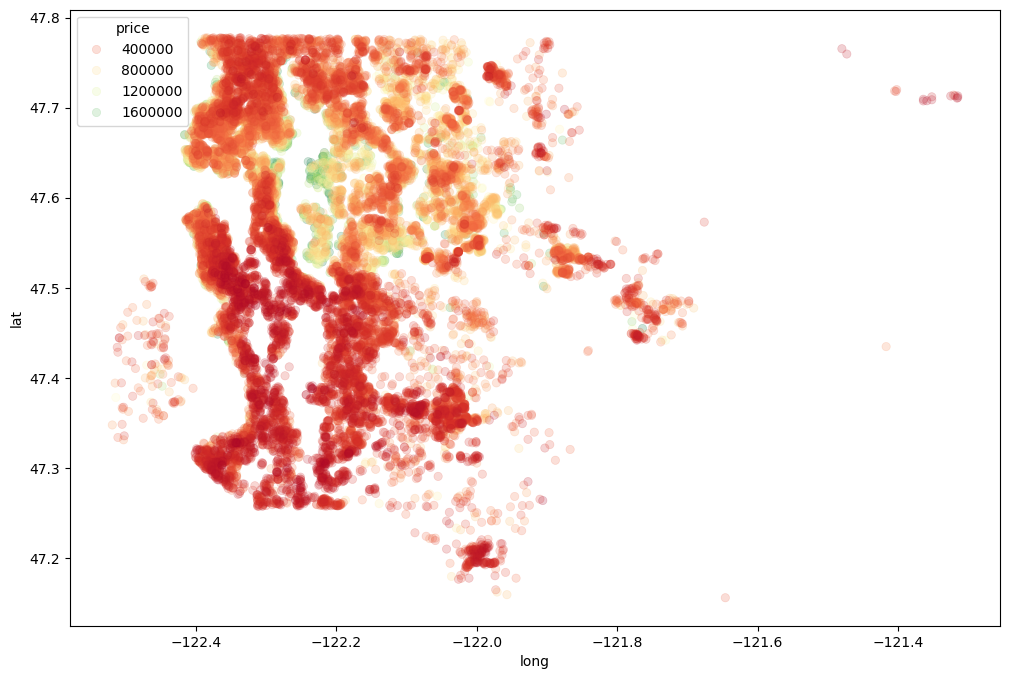

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price') #The most expensive houses are in the 98039 zip code (Mercer Island)

<Axes: xlabel='waterfront', ylabel='price'>

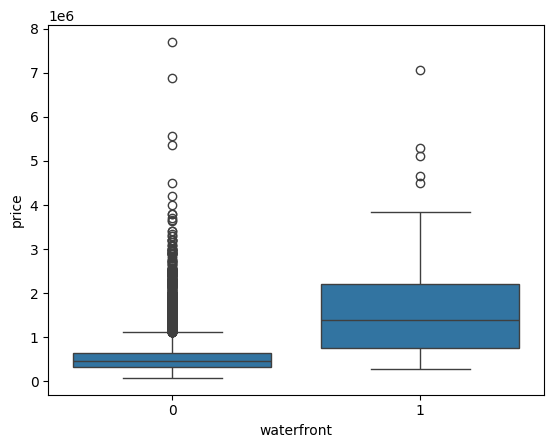

In [15]:
sns.boxplot(x='waterfront',y='price',data=df) #Houses with waterfront are more expensive

In [16]:
df.drop('id',axis=1,inplace=True) #Drop id column

In [17]:
df["year"] = df['date'].apply(lambda date: date.year)
df["month"] = df['date'].apply(lambda date: date.month)

<Axes: xlabel='year'>

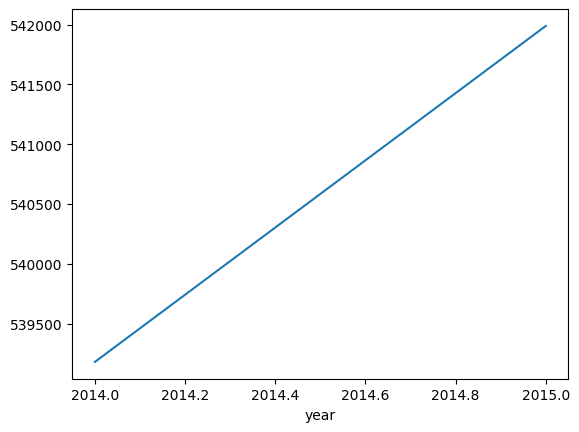

In [18]:
df.groupby('year').mean()['price'].plot() #Prices have increased over the years

In [19]:
df = df.drop('date',axis=1) #Drop date column

In [20]:
df = df.drop('zipcode',axis=1) #Drop zipcode column

In [21]:
X = df.drop('price',axis=1).values #Features
y = df['price'].values #Target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=25)

In [24]:
scaler = MinMaxScaler() #Scale the data

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test) 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential() #Create the model

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu')) #We will use 4 layers with 19 neurons each

model.add(Dense(1)) #Output layer

model.compile(optimizer='adam',loss='mse') #Compile the model

In [29]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400) #Train the model

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 432696983552.0000 - val_loss: 430357839872.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426613014528.0000 - val_loss: 425263005696.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 415424151552.0000 - val_loss: 381295329280.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 333244530688.0000 - val_loss: 241389879296.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 215617847296.0000 - val_loss: 113939955712.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101580701696.0000 - val_loss: 100326588416.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97944109056.0000 - val_loss: 98626805760.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 100221845504.0000 - val_loss: 97061052416.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95494078464.0000 - val_loss: 95457648640.0000
Epoch 10/400
119/119 ━━━

In [30]:
losses = pd.DataFrame(model.history.history) #Check the losses

<Axes: >

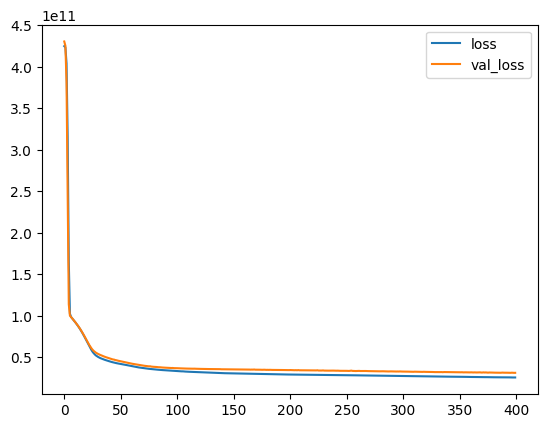

In [31]:
losses.plot() #The model is overfitting

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [33]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


In [34]:
np.sqrt(mean_squared_error(y_test,predictions)) #The model is off by 170,000

np.float64(177540.9132536496)

In [35]:
explained_variance_score(y_test,predictions) #The model explains 76% of the variance

0.7685416146087314

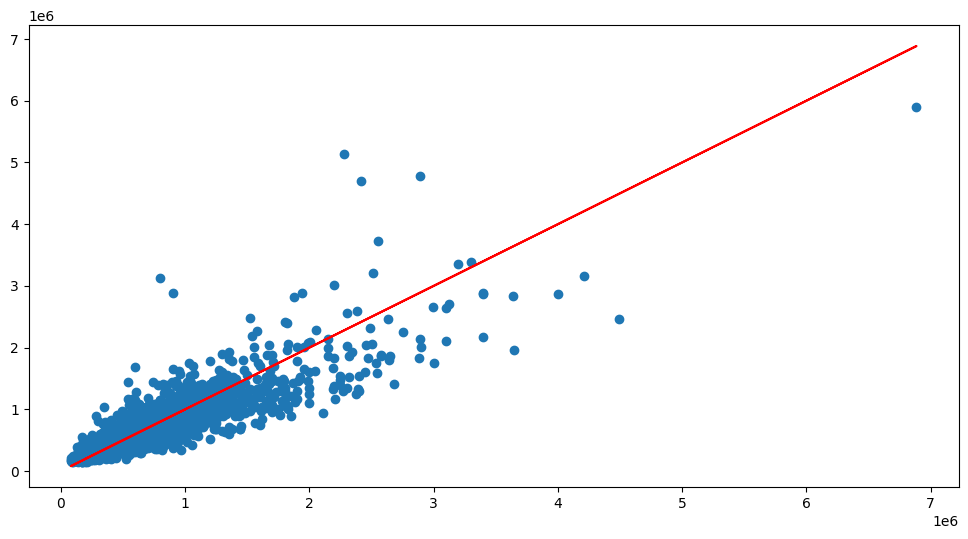

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions) #The model is not perfect, but it is doing a good job
plt.plot(y_test,y_test,'r') #The model is underestimating the price of the most expensive houses

In [38]:
single_house = df.drop('price',axis=1).iloc[0] #We will predict the price of the first house in the dataset

In [39]:
single_house = scaler.transform(single_house.values.reshape(-1,19)) #Scale the data and reshape it to match the input shape of the model

In [40]:
model.predict(single_house) #The model predicts the price of the first house in the dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[276557.03]], dtype=float32)

In [41]:
df.head(1) #The actual price of the first house in the dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
